In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

<h2><b>Creating dataframe from the csv file </h2></b>

In [6]:
df=pd.read_csv('bat.csv')

In [7]:
# Dropping columns that are not useful for prediction
df.drop(columns=['name_y','scorecard_id','fall_of_wicket','match_number'],inplace=True)

# Changing start_date column to date time format
df['start_date']=pd.to_datetime(df['start_date']).dt.tz_convert(None)

<H2><B> Exploratory data analysis

In [8]:
print(df.isnull().sum())
print(df.describe())

Unnamed: 0                0
name_x                    0
playing_role           1543
id                        0
order                     0
runs_x                    0
balls                     0
strike_rate               0
fours                     0
sixes                     0
how_out                   9
fall_of_wicket_over       0
player_id                 0
start_date                0
matchtype                37
series_id                 0
match_detail_id           0
title                     0
runs_y                    0
over                      0
run_rate                  0
match_id                  0
opp_team_id               0
team_id                   0
dtype: int64
         Unnamed: 0            id         order        runs_x         balls  \
count  52492.000000  52492.000000  52492.000000  52492.000000  52492.000000   
mean   26245.500000  26252.872723      4.102073     22.751353     27.899013   
min        0.000000      1.000000      0.000000      0.000000      0.000000   

In [9]:
print(df.columns)
print(df.values[9])

Index(['Unnamed: 0', 'name_x', 'playing_role', 'id', 'order', 'runs_x',
       'balls', 'strike_rate', 'fours', 'sixes', 'how_out',
       'fall_of_wicket_over', 'player_id', 'start_date', 'matchtype',
       'series_id', 'match_detail_id', 'title', 'runs_y', 'over', 'run_rate',
       'match_id', 'opp_team_id', 'team_id'],
      dtype='object')
[13453 'Joginder Sharma' 'AR' 13454 9 5 2 250.0 1 0 'not out' 0.0 853
 Timestamp('2004-12-22 18:30:00') 'odi' 182 773 'India Innings' 245 50.0
 4.9 633 7 2]


<h2><b> Data PreProcessing & Feature Enginnering </h2>

In [10]:
df['playing_role'].fillna('Unknown',inplace=True)
df.isnull().sum()
df['total_runs']=df['runs_x']
df['avg_runs_last'] = df.groupby('player_id')['runs_x'].rolling(3).mean().reset_index(level=0, drop=True)
df['avg_strike_rate_last'] = df.groupby('player_id')['strike_rate'].rolling(3).mean().reset_index(level=0, drop=True)

<ipython-input-10-75d218a1ef1c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['playing_role'].fillna('Unknown',inplace=True)


In [11]:
df['avg_runs_last'].fillna(df.groupby('player_id')['runs_x'].transform('mean'), inplace=True)
df['avg_strike_rate_last'].fillna(df.groupby('player_id')['strike_rate'].transform('mean'), inplace=True)

<ipython-input-11-2d60411c1042>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_runs_last'].fillna(df.groupby('player_id')['runs_x'].transform('mean'), inplace=True)
<ipython-input-11-2d60411c1042>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

<h2><b> Splitting testing and training data </h2>

In [12]:
X=df[['balls','strike_rate','fours','sixes','order','avg_runs_last','avg_strike_rate_last']]
Y=df['total_runs']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

<h2><b> Training models

In [13]:
def train_model(X_train,Y_train,X_test,Y_test,model):

  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  return model, Y_pred

In [14]:
model=LinearRegression()
model, Y_pred=train_model(X_train,Y_train,X_test,Y_test,model)

model2=DecisionTreeRegressor()
model2, Y_pred2=train_model(X_train,Y_train,X_test,Y_test,model2)

model3=RandomForestRegressor()
model3, Y_pred3=train_model(X_train,Y_train,X_test,Y_test,model3)

<h2><b>Predicting result for a new data row</h2>

In [15]:
new_data = {
    'balls': 20,
    'strike_rate': 130,
    'fours': 3,
    'sixes': 1,
    'order': 5,
    'avg_runs_last':56,
    'avg_strike_rate_last':150,
}
dddf=pd.DataFrame([new_data])
result=model.predict(dddf)
print(result[0])

31.733526355543006


In [16]:
result2=model2.predict(dddf)
print(result2[0])

27.0


<h2><b> MSE & MAE</h2>

In [17]:
def calculate_metrics(Y_true, Y_pred, model_name):
    mse = mean_squared_error(Y_true, Y_pred)
    mae = mean_absolute_error(Y_true, Y_pred)
    r2 = r2_score(Y_true, Y_pred)
    print(f"Performance metrics for {model_name}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-Squared (R²): {r2}")
    return mse, mae, r2

In [18]:
mse_lr, mae_lr, r2_lr=calculate_metrics(Y_test.values, Y_pred, model)
mse_dt, mae_dt, r2_dt=calculate_metrics(Y_test.values, Y_pred2, model2)
mse_rf, mae_rf, r2_rf=calculate_metrics(Y_test.values, Y_pred3, model3)

Performance metrics for LinearRegression():
Mean Squared Error (MSE): 42.210576948791065
Mean Absolute Error (MAE): 4.134083422469725
R-Squared (R²): 0.9445733373904649
Performance metrics for DecisionTreeRegressor():
Mean Squared Error (MSE): 10.873607010191447
Mean Absolute Error (MAE): 0.814553767025431
R-Squared (R²): 0.9857218784800378
Performance metrics for RandomForestRegressor():
Mean Squared Error (MSE): 4.152059329459949
Mean Absolute Error (MAE): 0.4505238594151824
R-Squared (R²): 0.9945479354175153


<h2><b>Comparing how the models performed</h2></b>

In [19]:
def compare_models(mse_lr, mae_lr, r2_lr,mse_dt, mae_dt, r2_dt,mse_rf, mae_rf, r2_rf):

   comparison_data = {
       'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
       'MSE': [mse_lr, mse_dt, mse_rf ],
       'MAE': [mae_lr, mae_dt, mae_rf],
       'R²': [r2_lr, r2_dt, r2_rf]
   }

   comparison_df = pd.DataFrame(comparison_data)
   print("\nPerformance comparison:")
   print(comparison_df)

   comparison_df.set_index('Model', inplace=True)
   comparison_df.plot(kind='bar', color=['blue', 'red', 'green'])

   # Add labels and title
   plt.title('Comparison of Model Performance')
   plt.ylabel('Metric Value')
   plt.xticks(rotation=0)
   plt.grid(True)

   # Show the plot
   plt.show()


Performance comparison:
               Model        MSE       MAE        R²
0  Linear Regression  42.210577  4.134083  0.944573
1      Decision Tree  10.873607  0.814554  0.985722
2      Random Forest   4.152059  0.450524  0.994548


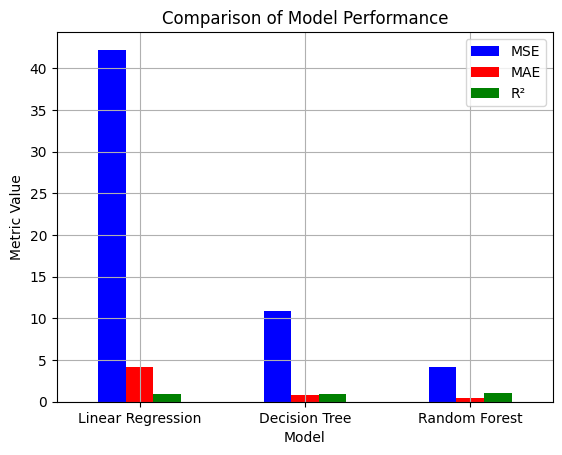

In [20]:
compare_models(mse_lr, mae_lr, r2_lr,mse_dt, mae_dt, r2_dt,mse_rf, mae_rf, r2_rf)

<h3><b>Verifying the features importance to prediction

In [21]:
importance=model2.feature_importances_

feature_name=X.columns
feature_imp_df=pd.DataFrame({'feature':feature_name,'importance':importance})
feature_imp_df.sort_values(by='importance',ascending=False)
feature_imp_df

,feature,importance
0,balls,0.184480
1,strike_rate,0.062860
2,fours,0.687123
3,sixes,0.055550
4,order,0.000575
5,avg_runs_last,0.008584
6,avg_strike_rate_last,0.000828


<h2><b> Cross validating model using k-fold

In [22]:
# for linear regression
kf=KFold(n_splits=4, shuffle=True, random_state=40)
scores=cross_val_score(model,X,Y,cv=kf,scoring='neg_mean_squared_error')
print(-scores.mean())

42.57220585416713


In [23]:
# for decision tree
scores2=cross_val_score(model2,X,Y,cv=kf,scoring='neg_mean_squared_error')
print(-scores2.mean())

11.574697096700449


In [24]:
# for random forest
scores3=cross_val_score(model3,X,Y,cv=kf,scoring='neg_mean_squared_error')
print(-scores3.mean())

4.067350662958164


<h2><b> Actual vs Predicted values

In [25]:
def compare_predictions(Y_test, Y_pred, model_name):
    plt.plot(Y_test.values, label='Actual', color='blue')
    plt.plot(Y_pred, label='Predicted', color='red')
    plt.xlabel('Index')
    plt.ylabel('Runs')
    plt.title(f'Actual vs Predicted ({model_name})')
    plt.legend()
    plt.show()

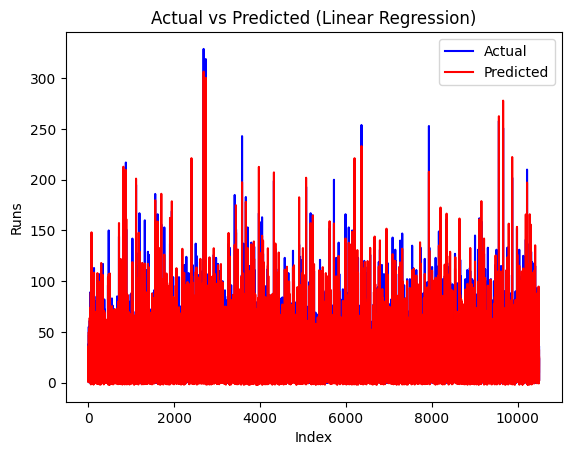

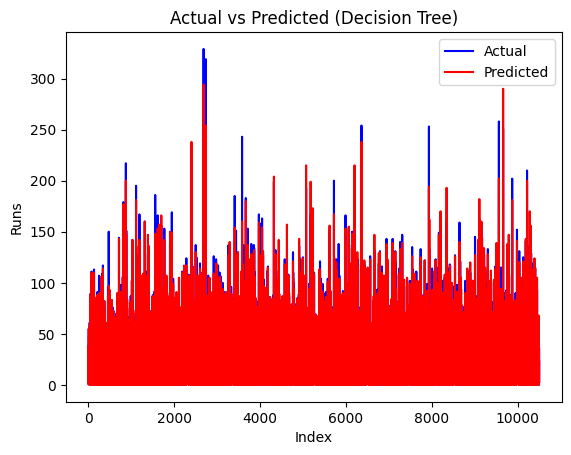

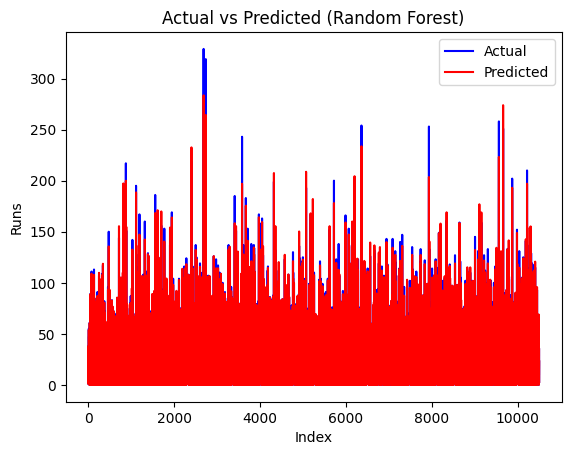

In [26]:
compare_predictions(Y_test, Y_pred, "Linear Regression")
compare_predictions(Y_test, Y_pred2, "Decision Tree")
compare_predictions(Y_test, Y_pred3, "Random Forest")

<h2><b>Visualizing player's performance over time

In [27]:
def compare_player(player_name, df, y_test, y_pred_lr, y_pred_dt, y_pred_rf):

    df['year'] = df['start_date'].dt.year

    # Get the test data for the corresponding y_test indices
    test_data = df.loc[y_test.index]
    test_data['actual'] = y_test.values

    test_data['predicted_lr'] = y_pred_lr     # For linear regression
    test_data['predicted_dt'] = y_pred_dt     # For decision tree
    test_data['predicted_rf'] = y_pred_rf     # For random forest

    # Filter data for the specific player
    player_data = test_data[test_data['name_x'] == player_name]

    # Group actual and predicted values by year
    yearly_data = player_data.groupby('year').agg(
        actual=('actual', 'sum'),
        predicted_lr=('predicted_lr', 'sum'),
        predicted_dt=('predicted_dt', 'sum'),
        predicted_rf=('predicted_rf', 'sum'),
    ).reset_index()

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_data['year'], yearly_data['actual'], color='blue', label='Actual', marker='o')        # Actual data from dataset
    plt.plot(yearly_data['year'], yearly_data['predicted_lr'], color='red', linestyle='--', label='Linear', marker='x')
    plt.plot(yearly_data['year'], yearly_data['predicted_dt'], color='green', linestyle='--', label='Decision Tree', marker='s')
    plt.plot(yearly_data['year'], yearly_data['predicted_rf'], color='black', linestyle='--', label='Random Forest', marker='x')

    # Customize the plot to show some of the years
    plt.xticks([2008,2013,2017,2020])
    plt.grid(True)
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Runs')
    plt.title(f'Actual vs Predicted Performance for {player_name}')
    plt.show()

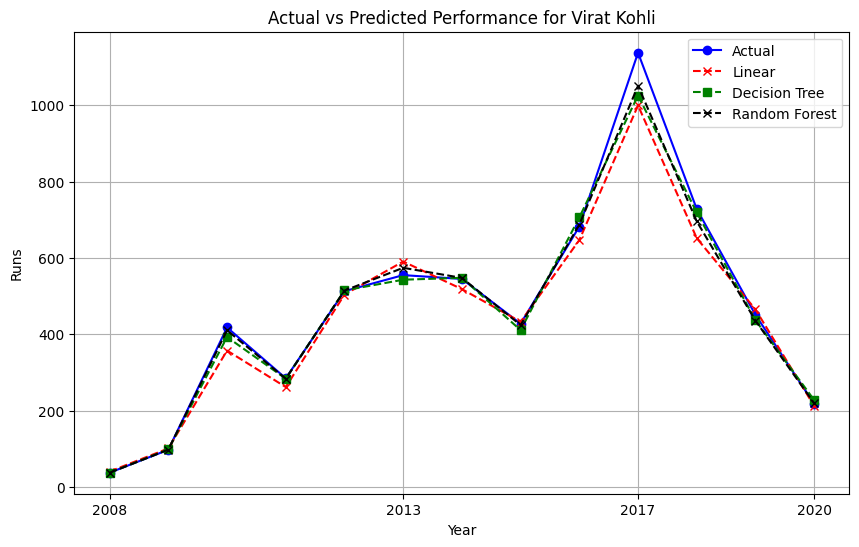

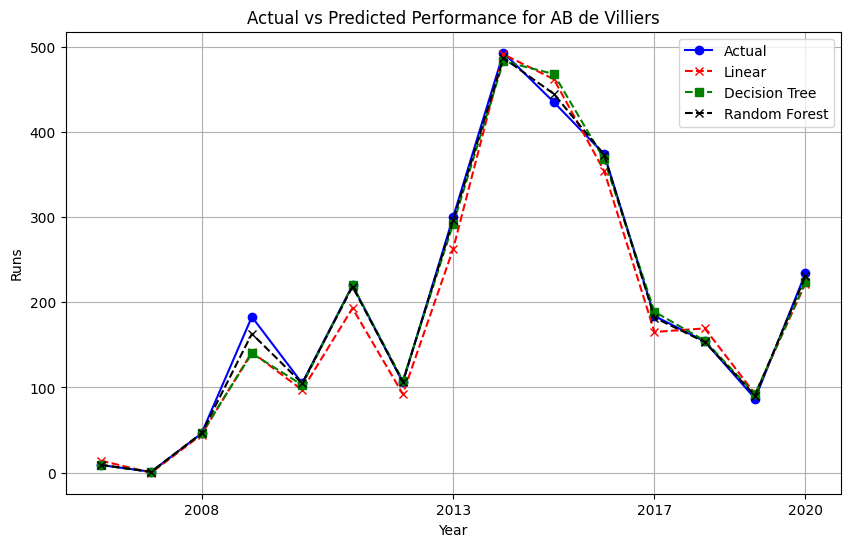

In [28]:
compare_player('Virat Kohli',df,Y_test,Y_pred,Y_pred2,Y_pred3)
compare_player('AB de Villiers',df,Y_test,Y_pred,Y_pred2,Y_pred3)

<h2><b>Predicting player's strike rate

In [29]:
Xsk=df[['balls','runs_x','fours','sixes','order','avg_runs_last','avg_strike_rate_last']]
Ysk=df['strike_rate']
Xsk_train,Xsk_test,Ysk_train,Ysk_test=train_test_split(Xsk,Ysk,test_size=0.2,random_state=41)

<h2><b> Training Models</h2>

In [30]:
model_SK=LinearRegression()
model_SK,pred_SK_lr=train_model(Xsk_train,Ysk_train,Xsk_test,Ysk_test,model_SK)

model2_SK=DecisionTreeRegressor()
model2_SK,pred_SK_dt=train_model(Xsk_train,Ysk_train,Xsk_test,Ysk_test,model2_SK)

model3_SK=RandomForestRegressor()
model3_SK,pred_SK_rf=train_model(Xsk_train,Ysk_train,Xsk_test,Ysk_test,model3_SK)

Performance metrics for LinearRegression():
Mean Squared Error (MSE): 6794.297005520893
Mean Absolute Error (MAE): 68.02242316786898
R-Squared (R²): -7.921583996609327
Performance metrics for DecisionTreeRegressor():
Mean Squared Error (MSE): 8373.99745462425
Mean Absolute Error (MAE): 71.25566149157063
R-Squared (R²): -9.995886935486604
Performance metrics for RandomForestRegressor():
Mean Squared Error (MSE): 8320.634535819177
Mean Absolute Error (MAE): 71.21341348699876
R-Squared (R²): -9.925816144934345

Performance comparison:
               Model        MSE       MAE        R²
0  Linear Regression  42.210577  4.134083  0.944573
1      Decision Tree  10.873607  0.814554  0.985722
2      Random Forest   4.152059  0.450524  0.994548


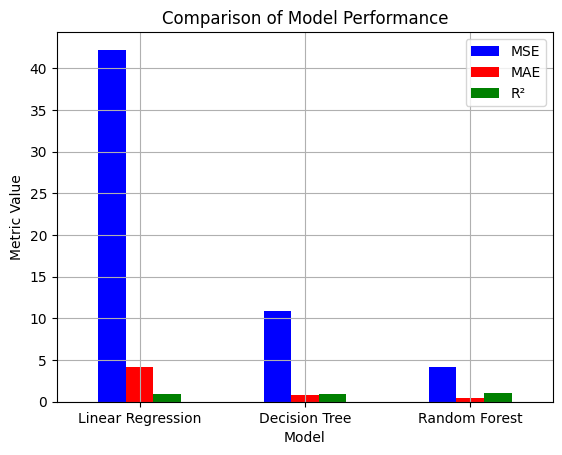

In [31]:
mse_SK_lr, mae_SK_lr, r2__SK_lr=calculate_metrics(Y_test.values, pred_SK_lr, model)
mse_SK_dt, mae_SK_dt, r2_SK_dt_=calculate_metrics(Y_test.values, pred_SK_dt, model2)
mse_SK_rf, mae_SK_rf, r2__SK_rf=calculate_metrics(Y_test.values, pred_SK_rf, model3)

compare_models(mse_lr, mae_lr, r2_lr,mse_dt, mae_dt, r2_dt,mse_rf, mae_rf, r2_rf)

<h2><b>Visualizing strike rate of players over time

In [32]:
def compare_players_sk(names, colors):
  df['year']=df['start_date'].dt.year
  # print(df['year'].head())
  graph_data=df.groupby(['name_x','year'])['strike_rate'].sum().reset_index()

  for name,color in zip(names,colors):
    player_graph_data=graph_data[graph_data['name_x']==name]
    plt.plot(player_graph_data['year'],player_graph_data['strike_rate'],color=color,label=name)
    plt.xticks([2005, 2010, 2015, 2020])
    plt.grid()
    plt.legend()
    plt.xlabel('Years')
    plt.ylabel('Strike Rate')
    plt.title('Performance chart of different players across years')

plt.show()

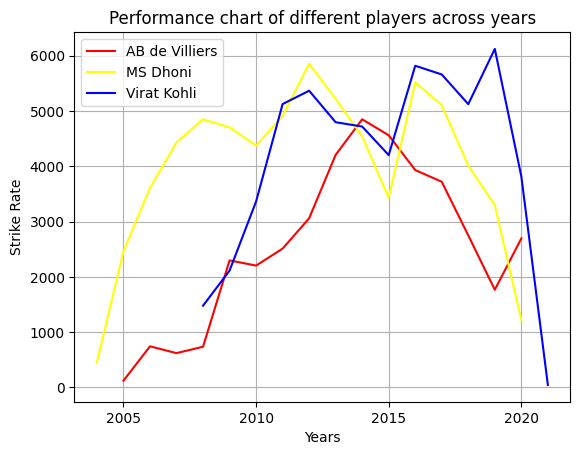

In [33]:
compare_players_sk(['AB de Villiers','MS Dhoni', 'Virat Kohli'],['red','yellow','blue'])

<h2><b>Actual vs Predicted strike rate </h2></b>

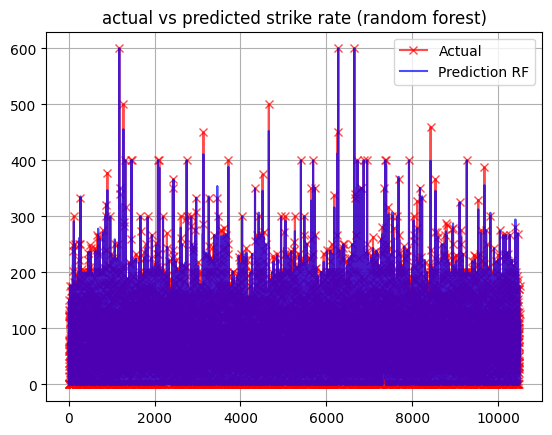

In [34]:
plt.plot(Ysk_test.values, color='red', label='Actual', marker='x', alpha=0.7)
plt.plot(pred_SK_rf, color='blue', label='Prediction RF', alpha=0.7)
plt.grid()
plt.legend()
plt.title('actual vs predicted strike rate (random forest)')
plt.show()

<h2><b> To train different models for different formats</h2>

In [35]:
def last_avg(data,format):
  num=3
  if format=='t20':
    num=5
  return data.groupby('player_id')['runs_x'].rolling(num).mean().reset_index(level=0, drop=True),data.groupby('player_id')['strike_rate'].rolling(num).mean().reset_index(level=0, drop=True)

In [36]:
def model_training(format):

  format_data=df[df['matchtype']==format]


  X_format=format_data[['balls','strike_rate','fours','sixes','order']]
  Y_format=format_data['runs_x']
  Xf_train,Xf_test,Yf_train,Yf_test=train_test_split(X_format,Y_format,test_size=0.2,random_state=40)

  model_format=RandomForestRegressor()
  model_format.fit(Xf_train,Yf_train)
  pred_format=model_format.predict(Xf_test)

  mse_format=mean_squared_error(Yf_test,pred_format)
  mae_format=mean_absolute_error(Yf_test,pred_format)

  print('for the format:',format)
  print("mean squared error",mse_format)
  print("mean absolute error",mae_format)
  print('------------------------------')


In [37]:
model_training('test')
model_training('odi')
model_training('t20')

for the format: test
mean squared error 13.276243259911897
mean absolute error 0.8870308370044052
------------------------------
for the format: odi
mean squared error 0.5220333028362304
mean absolute error 0.21942665446782558
------------------------------
for the format: t20
mean squared error 0.359556281610358
mean absolute error 0.06918268258142826
------------------------------
